In [1]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

In [2]:

import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
f = open("train.txt",'r')

'''
    Les données sont enregistrés sur df avec deux colonnes 
    colonne 'label' => langage maternelle
    colonne 'doc' => phrases en anglais 
'''
label=[]
phrase=[]
lines = f.readlines()
for l in lines:
    label.append(l[:5])
    phrase.append(l[5:])
labelSet=set(label)
df = pd.DataFrame(list(zip(label, phrase)), columns =['label', 'doc']) 

In [4]:
Y=df["label"].tolist()
le = LabelEncoder()
le.fit(df.label.unique())
langue = le.classes_
y=le.fit_transform(Y)

langue_encoder = [(langue[i],i) for i in range(len(langue))]
print(langue_encoder)


[('(ARA)', 0), ('(CHI)', 1), ('(FRE)', 2), ('(GER)', 3), ('(HIN)', 4), ('(ITA)', 5), ('(JPN)', 6), ('(KOR)', 7), ('(SPA)', 8), ('(TEL)', 9), ('(TUR)', 10)]


In [6]:

def nlp_tfidf_classification(X,y_encoded):
    tfidf_vectorizer = TfidfVectorizer(max_features=10000)
    X_tfidf = tfidf_vectorizer.fit_transform(X)
    X_tfidf = X_tfidf.toarray()

    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_tfidf.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(11, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
    
    y_pred = model.predict(X_test).argmax(axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {accuracy:.4f}")

    return model,y_pred,y_test

model,y_pred,y_test = nlp_tfidf_classification(df["doc"],y)



Epoch 1/10
223/223 [==============================] - 4s 14ms/step - loss: 2.3175 - accuracy: 0.1667 - val_loss: 2.0225 - val_accuracy: 0.3333
Epoch 2/10
223/223 [==============================] - 5s 23ms/step - loss: 1.7279 - accuracy: 0.3803 - val_loss: 1.3796 - val_accuracy: 0.5682
Epoch 3/10
223/223 [==============================] - 2s 9ms/step - loss: 1.1922 - accuracy: 0.5787 - val_loss: 1.0634 - val_accuracy: 0.6705
Epoch 4/10
223/223 [==============================] - 2s 9ms/step - loss: 0.8293 - accuracy: 0.7210 - val_loss: 0.9131 - val_accuracy: 0.7033
Epoch 5/10
223/223 [==============================] - 2s 9ms/step - loss: 0.5999 - accuracy: 0.8084 - val_loss: 0.8523 - val_accuracy: 0.6982
Epoch 6/10
223/223 [==============================] - 2s 9ms/step - loss: 0.4461 - accuracy: 0.8685 - val_loss: 0.8306 - val_accuracy: 0.6995
Epoch 7/10
223/223 [==============================] - 2s 9ms/step - loss: 0.3323 - accuracy: 0.9039 - val_loss: 0.8257 - val_accuracy: 0.6982
Epoc

In [63]:
model,y_pred,y_test = nlp_tfidf_classification(df["doc"],y)

Epoch 1/10
223/223 [==============================] - 3s 11ms/step - loss: 2.3096 - accuracy: 0.1661 - val_loss: 1.9764 - val_accuracy: 0.4053
Epoch 2/10
223/223 [==============================] - 2s 9ms/step - loss: 1.6838 - accuracy: 0.3930 - val_loss: 1.3793 - val_accuracy: 0.5985
Epoch 3/10
223/223 [==============================] - 2s 10ms/step - loss: 1.1961 - accuracy: 0.5824 - val_loss: 1.0984 - val_accuracy: 0.6641
Epoch 4/10
223/223 [==============================] - 2s 9ms/step - loss: 0.8681 - accuracy: 0.7015 - val_loss: 0.9320 - val_accuracy: 0.6982
Epoch 5/10
223/223 [==============================] - 2s 9ms/step - loss: 0.6288 - accuracy: 0.8012 - val_loss: 0.8688 - val_accuracy: 0.7109
Epoch 6/10
223/223 [==============================] - 2s 10ms/step - loss: 0.4557 - accuracy: 0.8593 - val_loss: 0.8306 - val_accuracy: 0.7159
Epoch 7/10
223/223 [==============================] - 2s 10ms/step - loss: 0.3417 - accuracy: 0.8981 - val_loss: 0.8309 - val_accuracy: 0.7235
Ep

<AxesSubplot: >

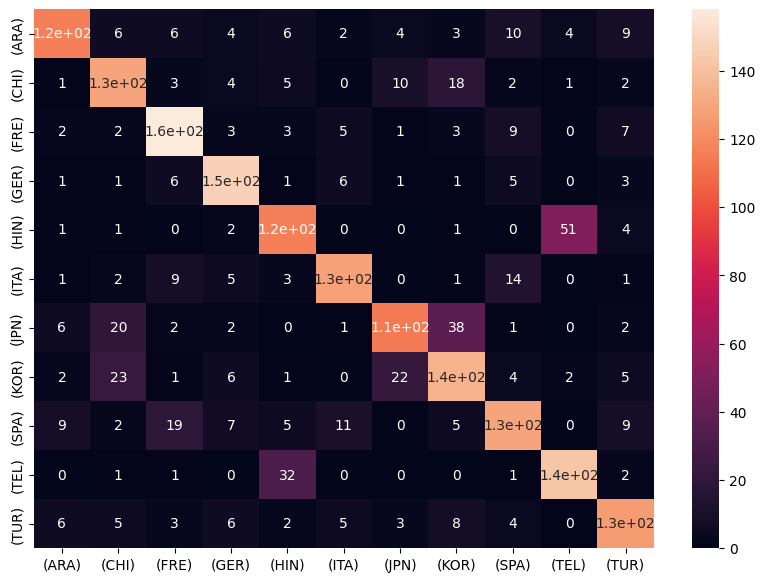

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
C2 = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(C2, index=list(langue), columns=list(langue))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

TEL9 et HIN4 est tres facile de mélanger, on faire une modele pour classifier que HIN et TEL

In [8]:
TEL = df[df.label == "(TEL)"]
HIN = df[df.label == "(HIN)"]

df_HIN_TEL = pd.concat([TEL, HIN])
y_HINTEL = df_HIN_TEL.label.tolist()
for i in range(len(y_HINTEL)):
    y_HINTEL[i] = 1 if y_HINTEL[i] == "(TEL)" else 0
    # 1 : TEL
y_HINTEL = np.array(y_HINTEL)


In [9]:
X=df_HIN_TEL["doc"]
y_encoded = y_HINTEL
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(X)
X_tfidf = X_tfidf.toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

In [10]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

In [12]:
def nlp_tfidf_sous_classification(X,y_encoded):
    tfidf_vectorizer = TfidfVectorizer(max_features=10000)
    X_tfidf = tfidf_vectorizer.fit_transform(X)
    X_tfidf = X_tfidf.toarray()

    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_tfidf.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
    
    y_pred = model.predict(X_test).argmax(axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {accuracy:.4f}")

    return model,y_pred,y_test

In [13]:
sousModel,sous_y_pred,sous_y_test = nlp_tfidf_sous_classification(df_HIN_TEL["doc"],y_HINTEL)

Epoch 1/10
41/41 [==============================] - 1s 14ms/step - loss: 0.6867 - accuracy: 0.5525 - val_loss: 0.6770 - val_accuracy: 0.6111
Epoch 2/10
41/41 [==============================] - 0s 9ms/step - loss: 0.6159 - accuracy: 0.7346 - val_loss: 0.5912 - val_accuracy: 0.7361
Epoch 3/10
41/41 [==============================] - 0s 9ms/step - loss: 0.4260 - accuracy: 0.8480 - val_loss: 0.4619 - val_accuracy: 0.7708
Epoch 4/10
41/41 [==============================] - 0s 11ms/step - loss: 0.2173 - accuracy: 0.9329 - val_loss: 0.4520 - val_accuracy: 0.7708
Epoch 5/10
41/41 [==============================] - 0s 9ms/step - loss: 0.0991 - accuracy: 0.9792 - val_loss: 0.4941 - val_accuracy: 0.7639
Epoch 6/10
41/41 [==============================] - 0s 9ms/step - loss: 0.0460 - accuracy: 0.9907 - val_loss: 0.5344 - val_accuracy: 0.7639
Epoch 7/10
41/41 [==============================] - 0s 9ms/step - loss: 0.0254 - accuracy: 0.9961 - val_loss: 0.5772 - val_accuracy: 0.7500
Epoch 8/10
41/41 [

In [119]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer

HT_X = df_HIN_TEL["doc"]
cv = CountVectorizer()
cv_X = cv.fit_transform(HT_X)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cv_X, y_HINTEL, random_state=4)


print(X_train.shape)

(1350, 20134)


In [123]:

tfV = TfidfVectorizer(ngram_range=(2,2))
tf_X = tfV.fit_transform(X)
X_trainTF, X_testTF, y_trainTF, y_testTF = train_test_split(tf_X, y_HINTEL, random_state=4)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
tf_lr = lr.fit(X_trainTF, y_trainTF)
y_pred = tf_lr.predict(X_testTF)
accuracy = accuracy_score(y_testTF, y_pred)
print(accuracy)

0.7888888888888889


In [115]:

lr = LogisticRegression()
bow_lr = lr.fit(X_train, y_train)
y_pred = bow_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7511111111111111


c:\Users\guoxu\Desktop\myenvs\mlstat\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
def nlp_tfidf_sous_classification(X,y_encoded):
    tfidf_vectorizer = TfidfVectorizer(max_features=10000)
    X_tfidf = tfidf_vectorizer.fit_transform(X)
    X_tfidf = X_tfidf.toarray()

    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_tfidf.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
    
    y_pred = model.predict(X_test).argmax(axis=1)

    tfV = TfidfVectorizer(ngram_range=(2,2))
    tf_X = tfV.fit_transform(X)
    X_trainTF, X_testTF, y_trainTF, y_testTF = train_test_split(tf_X, y_HINTEL, random_state=4)

    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    tf_lr = lr.fit(X_trainTF, y_trainTF)
    y_pred = tf_lr.predict(X_testTF)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {accuracy:.4f}")

    return model,


Test accuracy: 0.87
